Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from metrics import print_evaluation_metrics
import numpy as np

Load dataset and prepare df

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date"
target_column = "Close"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column]]

df.set_index(date_column, inplace=True)
dates = df.index.values

Train test split

In [3]:
data_length = len(df)
train_split = 0.9
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

Parameter tuning for order

In [4]:
stepwise_fit = auto_arima(df, trace=True, suppress_warnings=True, max_p=10, max_q=10, test='adf', seasonal=False, m=12)
best_order = stepwise_fit.order

/home/samuell/.local/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=55270.613, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=55288.499, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=55287.646, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=55287.702, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=55287.358, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=55288.456, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=55288.678, Time=0.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=55272.922, Time=1.81 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=55272.518, Time=1.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=55289.577, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=55290.075, Time=0.66 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=55290.395, Time=0.45 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=55274.634, Time=1.92 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=55289.570, Time=0.25 sec

Best model:  ARIMA

Create Model

In [5]:
model = ARIMA(train[target_column], order=(10,1,10))
model = model.fit()
model.summary()

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3077
Model:               ARIMA(10, 1, 10)   Log Likelihood              -24840.629
Date:                Thu, 07 Mar 2024   AIC                          49723.257
Time:                        10:38:58   BIC                          49849.916
Sample:                    09-24-2014   HQIC                         49768.758
                         - 02-25-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2892      0.447     -0.647      0.518      -1.165       0.587
ar.L2          0.0796      0.090      0.889      0.374      -0.096       0.255
ar.L3         -0.3902      0.113     -3.444      0.001      -0.612      -0.168
ar.L4          0.4476      0.244      1.835      0.066      -0.030       0.926
ar.L5          0.2012      0.290      0.693      0.488      -0.368       0.770
ar.L6         -0.2873      0.096     -2.994      0.003      -0.475      -0.099
ar.L7          0.1939      0.214      0.904      0.366      -0.226       0.614
ar.L8         -0.3493      0.184     -1.902      0.057      -0.709       0.011
ar.L9         -0.4672      0.210     -2.226      0.026      -0.878      -0.056
ar.L10        -0.2605      0.187     -1.395      0.163      -0.627       0.106
ma.L1          0.2675      0.448      0.598      0.550      -0.610       1.145
ma.L2         -0.0857      0.089     -0.958      0.338      -0.261       0.090
ma.L3          0.4173      0.112      3.741      0.000       0.199       0.636
ma.L4         -0.4341      0.257     -1.692      0.091      -0.937       0.069
ma.L5         -0.1663      0.288     -0.578      0.563      -0.730       0.398
ma.L6          0.3218      0.090      3.558      0.000       0.145       0.499
ma.L7         -0.2391      0.222     -1.078      0.281      -0.674       0.196
ma.L8          0.3135      0.208      1.510      0.131      -0.093       0.720
ma.L9          0.5498      0.204      2.698      0.007       0.150       0.949
ma.L10         0.2751      0.224      1.227      0.220      -0.164       0.715
sigma2      6.165e+05   6007.230    102.624      0.000    6.05e+05    6.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):             29628.64
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):            1493.72   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Plot the result

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


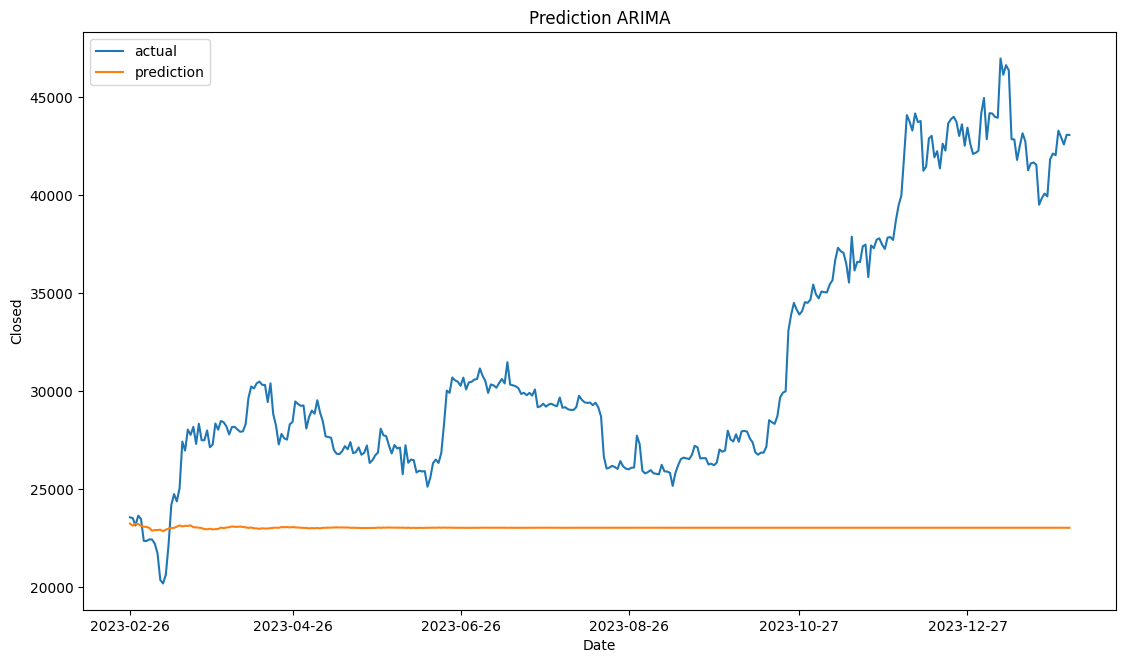

In [8]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ="levels")

fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], list(pred), label="prediction")
ax.set_title("Prediction ARIMA")
ax.set_ylabel("Closed")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

RMSE of the result

In [7]:
non_zero = []
import sys
 
for i in pred:
    if i == 0:
        non_zero.append(i+sys.float_info.min)
    else:
        non_zero.append(i)
print_evaluation_metrics(non_zero, test[target_column])

Evaluation Metrics:
MSE: 110452551.82
RMSE: 10509.64
MAE: 8448.10
MAPE: 24.30
SMAPE: 28.97
